In [1]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt
import scipy

In [2]:
r1 = 1./4.500
R1 = 1./0.240
r2 = 1./2.300
R2 = 1./0.040
theta1 = 1.5*2.67513
theta2 = 1

In [3]:
C = np.array([
    [-r2, 0, 0, theta2],
    [0, -r1, 2*theta2, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

C_independent = np.array([
    [-r2, theta1, 0, 0, theta2],
    [theta1, -r2, 0, 0, theta2],
    [0, 0, -r1, 2*theta2, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

J = np.array([
    [-r2, theta1, 0, 0, -theta2],
    [-theta1, -r2, 0, 0, -theta2],
    [0, 0, -r1, 2*theta2, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

eig = scipy.linalg.eigvals(0.5*(J + J.T))
C_single = np.array(max(np.real(eig)))

print C
print C_independent
print C_single

[[-0.43478261  0.          0.          1.        ]
 [ 0.         -0.22222222  2.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
[[-0.43478261  4.012695    0.          0.          1.        ]
 [ 4.012695   -0.43478261  0.          0.          1.        ]
 [ 0.          0.         -0.22222222  2.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
0.895042793126


In [4]:
step = 1e-03
delta0 = np.array([theta2, theta2, 0.001*(r1 + R1), 0.001*(r2 + R2)])
delta0_independent = np.array([theta2, theta2, theta2, 0.001*(r1 + R1), 0.001*(r2 + R2)])
delta0_single = np.array([theta2])
delta = []
delta_independent = []
delta_single = []
for k in range(30000):
    t = k*step
    delta.append(scipy.linalg.expm(t*C).dot(delta0))
    delta_independent.append(scipy.linalg.expm(t*C_independent).dot(delta0_independent))
    delta_single.append(np.exp(t*C_single)*delta0_single)

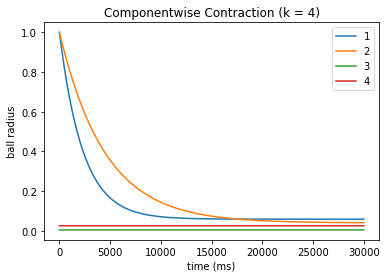

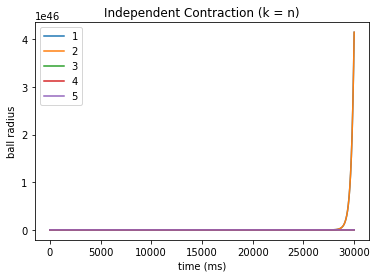

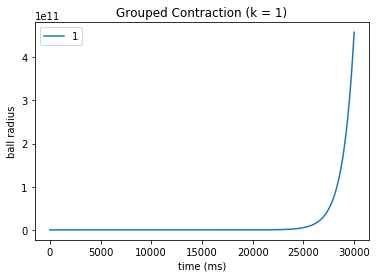

In [5]:
plt.plot(delta)
plt.xlabel("time (ms)")
plt.ylabel("ball radius")
plt.legend(["1", "2", "3", "4"])
plt.title("Componentwise Contraction (k = 4)")
plt.show()

plt.plot(delta_independent)
plt.xlabel("time (ms)")
plt.ylabel("ball radius")
plt.legend(["1", "2", "3", "4", "5"])
plt.title("Independent Contraction (k = n)")
plt.show()

plt.plot(delta_single)
plt.xlabel("time (ms)")
plt.ylabel("ball radius")
plt.legend(["1"])
plt.title("Grouped Contraction (k = 1)")
plt.show()